<a href="https://colab.research.google.com/github/sunil1206/Data-science-mini-projects/blob/main/Country_data_self.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

df= pd.read_csv('/content/Country-data.csv')
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
df.describe(include='int')

,income,gdpp
count,167.000000,167.000000
mean,17144.688623,12964.155689
std,19278.067698,18328.704809
min,609.000000,231.000000
25%,3355.000000,1330.000000
50%,9960.000000,4660.000000
75%,22800.000000,14050.000000
max,125000.000000,105000.000000


In [ ]:
df.describe(include='all')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
unique,167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Mauritius,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,NaN,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,NaN,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,NaN,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,NaN,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,NaN,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000


In [ ]:
df.shape

(167, 10)

In [ ]:
df.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [ ]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [ ]:
s# divide socio economic cplumns and health columns

socio = df[['country','imports','income','exports','inflation','gdpp']]
socio

NameError: ignored

In [ ]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

##GDP = C + I + G + X – M###
Net Exports
(X-M) in the above equation represents net exports. Net exports are the estimation of the total value of a country’s exports minus the total value of its imports. A positive net exports figure indicates a trade surplus.

On the other hand, a negative net exports figure indicates a trade deficit. A trade surplus or trade deficit reflects a country’s balance of trade (which is, essentially, whether a country is a net exporter or importer, and to what extent).

###feature engineering###

In [ ]:
df['net_expo']=df['exports']-df['imports']
#we can remove both exports and imports

In [ ]:
###HERE DEVELOPED COUNTRY==1
###DEVELOPING COUNTRIES=0
###UNDER DEVELOPED COUNTRY=-1

df.loc[(df['gdpp']>14050)&(df['income']>22800),'country status']='DEVELOPED COUNTRY'
df.loc[(df['gdpp']>4660)&(df['gdpp']<14050)|(df['income']>9960)&(df['income']<22800),'country status']='DEVELOPING COUNTRIES'
df.loc[(df['gdpp']<4660)&(df['gdpp']>1330)&(df['income']<9960)&(df['income']>3355),'country status']='UNDER DEVELOPED COUNTRY'
df.loc[(df['gdpp']<1330)&(df['income']<3355),'country status']='LEAST DEVELOPED COUNTRY'


A further classification, which is occasionally equated with a developing country has been created by the World Bank with a pure classification according to average annual income. These are the following levels:

Income below 995 US dollars: Low income countries

Income below 3895 US Dollar: Lower middle income countries

Income below 12055 US Dollar: Upper middle income countries

Income above 12056 US Dollar: High income countries


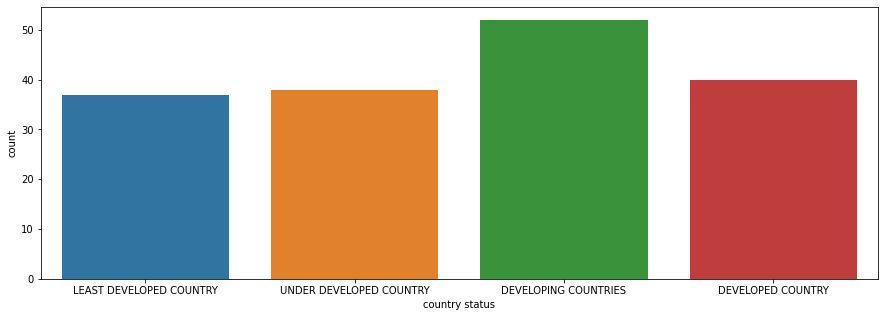

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot( x='country status', data= df)

In [ ]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country status
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,UNDER DEVELOPED COUNTRY
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,DEVELOPING COUNTRIES
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,DEVELOPED COUNTRY
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,DEVELOPING COUNTRIES
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,DEVELOPED COUNTRY
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,UNDER DEVELOPED COUNTRY
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,DEVELOPED COUNTRY
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,DEVELOPING COUNTRIES
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,DEVELOPING COUNTRIES


In [ ]:
df.corr().style.background_gradient(cmap='Dark2')

,child_mort,health,income,inflation,life_expec,total_fer,gdpp,net_expo
child_mort,1.000000,-0.200402,-0.524315,0.288276,-0.886676,0.848478,-0.483032,-0.297734
health,-0.200402,1.000000,0.129579,-0.255376,0.210692,-0.196674,0.345966,-0.287892
income,-0.524315,0.129579,1.000000,-0.147756,0.611962,-0.501840,0.895571,0.591402
inflation,0.288276,-0.255376,-0.147756,1.000000,-0.239705,0.316921,-0.221631,0.160405
life_expec,-0.886676,0.210692,0.611962,-0.239705,1.000000,-0.760875,0.600089,0.388226
total_fer,0.848478,-0.196674,-0.501840,0.316921,-0.760875,1.000000,-0.454910,-0.259819
gdpp,-0.483032,0.345966,0.895571,-0.221631,0.600089,-0.454910,1.000000,0.458329
net_expo,-0.297734,-0.287892,0.591402,0.160405,0.388226,-0.259819,0.458329,1.000000


In [ ]:
#df.drop(df[['exports','imports']],axis=1, inplace=True)

In [ ]:
df.iloc[df['net_expo'].sort_values(ascending = False).head(10)]

,country,child_mort,health,income,inflation,life_expec,total_fer,gdpp,net_expo
39,Costa Rica,10.2,10.90,13000,6.570,80.4,1.92,8200,-1.80
38,"Congo, Rep.",63.9,2.46,5190,20.700,60.4,4.95,2740,30.40
38,"Congo, Rep.",63.9,2.46,5190,20.700,60.4,4.95,2740,30.40
36,Comoros,88.2,4.51,1410,3.870,65.9,4.75,769,-35.20
33,Chile,8.7,7.96,19400,8.960,79.1,1.88,12900,6.40
33,Chile,8.7,7.96,19400,8.960,79.1,1.88,12900,6.40
31,Central African Republic,149.0,3.98,888,2.010,47.5,5.21,446,-14.70
30,Cape Verde,26.5,4.09,5830,0.505,72.5,2.67,3310,-29.10
26,Burundi,93.6,11.60,764,12.300,57.7,6.26,231,-30.28
26,Burundi,93.6,11.60,764,12.300,57.7,6.26,231,-30.28


In [ ]:
top20_child_mort=df.nlargest(20, 'child_mort', keep='all')
top20_child_mort

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country status
66,Haiti,208.0,15.30,6.91,64.7,1500,5.450,32.1,3.33,662,UNDER DEVELOPED COUNTRY
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.200,55.0,5.20,399,UNDER DEVELOPED COUNTRY
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,UNDER DEVELOPED COUNTRY
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,LEAST DEVELOPED COUNTRY
97,Mali,137.0,22.80,4.98,35.1,1870,4.370,59.5,6.55,708,UNDER DEVELOPED COUNTRY
113,Nigeria,130.0,25.30,5.07,17.4,5150,104.000,60.5,5.84,2330,DEVELOPING COUNTRIES
112,Niger,123.0,22.20,5.16,49.1,814,2.550,58.8,7.49,348,LEAST DEVELOPED COUNTRY
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,DEVELOPING COUNTRIES
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,UNDER DEVELOPED COUNTRY
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334,LEAST DEVELOPED COUNTRY


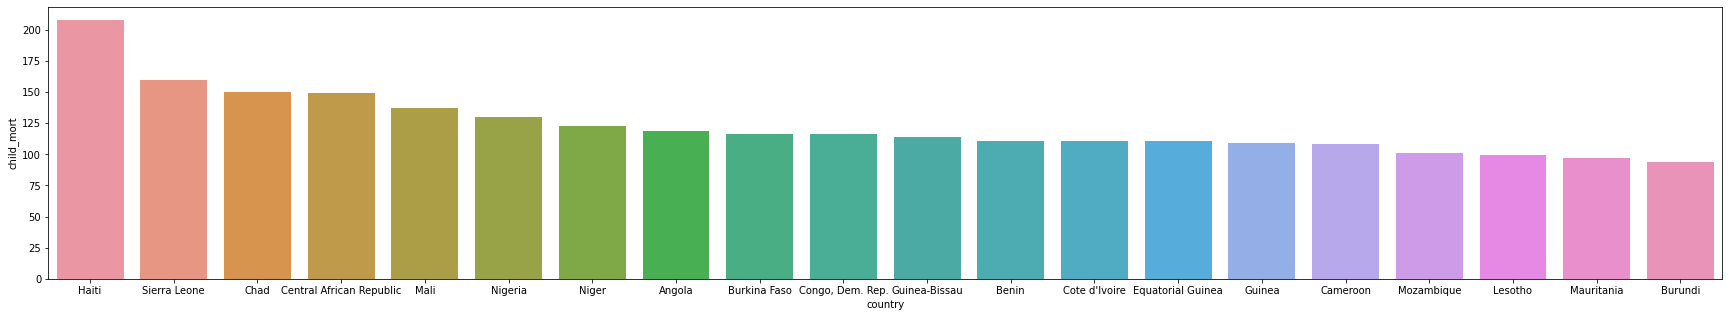

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#fig, axs = plt.subplots(3,3,figsize = (40,20))
plt.figure(figsize=(30,5))
sns.barplot(x='country', y='child_mort', data= top20_child_mort)


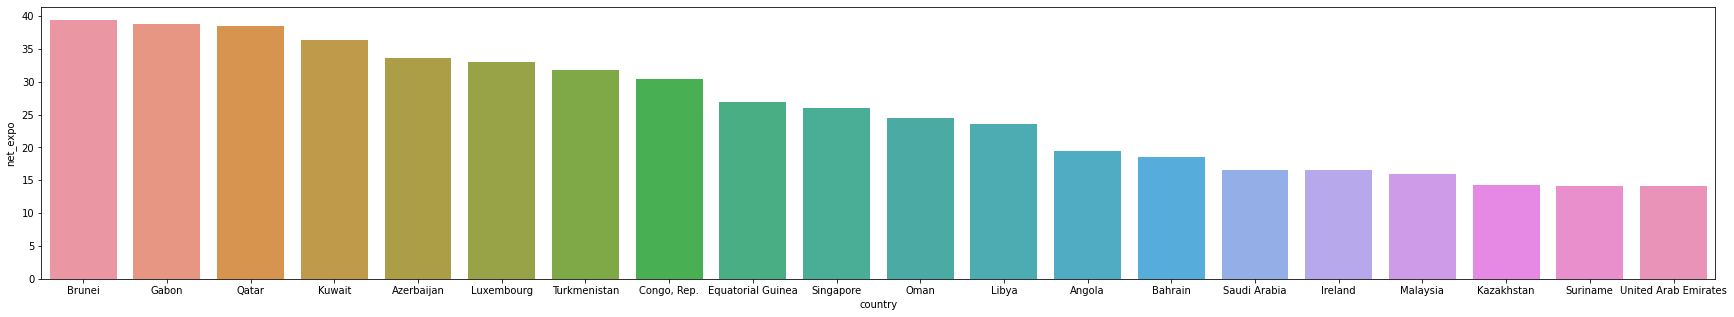

In [ ]:
net_expo_top= df.nlargest(20, 'net_expo', keep='all')

sns.barplot(x='country', y='net_expo', data= net_expo_top)

,country,child_mort,health,income,inflation,life_expec,total_fer,gdpp,net_expo
23,Brunei,10.5,2.84,80600,16.700,77.1,1.84,35300,39.4
55,Gabon,63.7,3.50,15400,16.600,62.9,4.08,8750,38.8
123,Qatar,9.0,1.81,125000,6.980,79.5,2.07,70300,38.5
82,Kuwait,10.8,2.63,75200,11.200,78.2,2.21,38500,36.3
9,Azerbaijan,39.2,5.88,16000,13.800,69.1,1.92,5840,33.6
91,Luxembourg,2.8,7.77,91700,3.620,81.3,1.63,105000,33.0
154,Turkmenistan,62.0,2.50,9940,2.310,67.9,2.83,4440,31.8
38,"Congo, Rep.",63.9,2.46,5190,20.700,60.4,4.95,2740,30.4
49,Equatorial Guinea,111.0,4.48,33700,24.900,60.9,5.21,17100,26.9
133,Singapore,2.8,3.96,72100,-0.046,82.7,1.15,46600,26.0


In [ ]:
net_expo_low= df.nsmallest(10, 'net_expo', keep='all')
net_expo_low

In [ ]:
df

In [ ]:
health=df[['country','child_mort','health','life_expec','total_fer']]

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a scaling object
scaler = StandardScaler()

# Create a list of the variables that you need to scale
health = ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
# Scale these variables using 'fit_transform'
scaled_data = scaler.fit_transform(df[health])

In [ ]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'country status'],
      dtype='object')

In [ ]:
from sklearn.cluster import KMeans
model_kmeans=KMeans(n_clusters=7)
model_kmeans.fit(scaled_data)
labels_kmeans=model_kmeans.predict(scaled_data)
print(labels_kmeans)

[0 2 3 0 2 3 3 1 1 3 2 2 3 2 2 1 2 0 2 3 2 6 3 1 2 0 0 2 0 1 2 0 0 3 3 3 6
 0 6 2 0 2 1 2 1 3 3 3 2 6 6 2 2 1 1 6 6 2 1 6 1 2 3 0 0 2 0 2 1 3 3 3 6 1
 1 1 3 1 2 3 6 6 1 2 6 2 2 0 0 3 2 5 2 6 0 2 2 0 5 6 2 2 2 3 2 3 0 3 6 3 1
 1 0 4 1 3 6 2 2 3 3 2 1 1 3 3 6 6 3 6 2 2 0 5 2 2 6 6 2 1 3 2 6 2 1 1 6 6
 2 6 0 6 2 3 6 0 2 1 1 1 3 3 6 3 2 6 0]


In [ ]:
df_final["scaled_data"]=labels_kmeans
group1_kmeans=df_final[df_final["scaled_data"]==0]
print('Number of customer in 1st group=', len(group1_kmeans))
group2_kmeans=df_final[df_final["scoio_eco_label"]==1]
print('Number of customer in 2 group=', len(group2_kmeans))
group3_kmeans=df_final[df_final["scoio_eco_label"]==2]
print('Number of customer in 3 group=', len(group3_kmeans))
group4_kmeans=df_final[df_final["scoio_eco_label"]==3]
print('Number of customer in 4 group=', len(group4_kmeans))
group5_kmeans=df_final[df_final["scoio_eco_label"]==4]
print('Number of customer in 5 group=', len(group5_kmeans))
group6_kmeans=df_final[df_final["scoio_eco_label"]==5]
print('Number of customer in 6 group=', len(group6_kmeans))
group7_kmeans=df_final[df_final["scoio_eco_label"]==6]
print('Number of customer in 7 group=', len(group6_kmeans))

NameError: ignored